In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
%matplotlib inline

In [28]:
#Gain control function
def gain_func(v):
    if v <0:
        print('廢物')
        return 1
    else:
        return 1/(1+v**4)

In [29]:
def K(x,s):
    return(np.exp(-(x/s)**2))/s/np.sqrt(np.pi)

# delta function

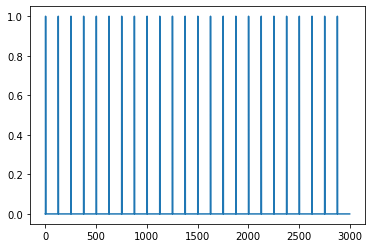

In [30]:
nstep = 3000
frequency = 8#Hz
dt = 0.001
nperiod = int((1/frequency)/dt)

# generation of stimulations
s = np.zeros(nstep)
for i in range(nstep):
    if i % nperiod ==3:
        s[i] = 1
#s = np.convolve(tp,s,'same')*dt
plt.plot(s)

In [31]:
x = np.zeros_like(s)#y output
y = np.zeros_like(s)#y output
B = 35
C = 1
beta = 17
for i in range(len(s)):
    if s[i] == 1:
        y[i] = np.exp(-beta*nperiod*dt)*(B*x[i-nperiod] + y[i-nperiod])
        x[i] = C/(1+y[i]**4)

In [32]:
np.exp(-beta*nperiod*dt)

0.11943296826671962

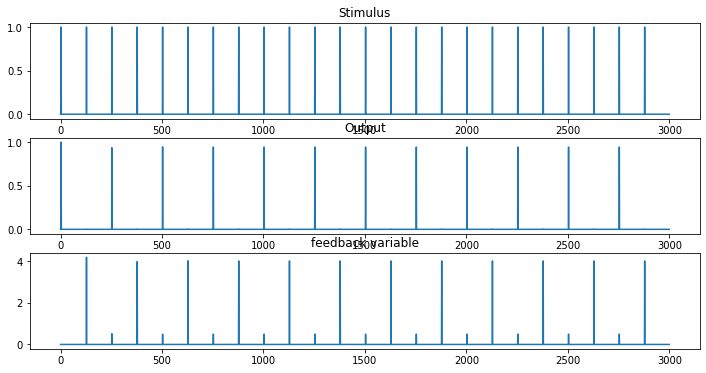

In [33]:
plt.subplot(311)
plt.plot(s)
plt.title('Stimulus')
plt.subplot(312)
plt.plot(x)
plt.title('Output')
plt.subplot(313)
plt.plot(y)
plt.title('feedback variable')
plt.gcf().set_size_inches(12,6)

In [34]:
x = np.zeros_like(s)#y output
y = np.zeros_like(s)#y output
gains = np.zeros_like(s)#y output

B = 35
tau = 1/17

v = 0.0
for i in range(len(s)):
    feedback_filter = np.exp(-np.arange(0,i)*dt/tau)
    y[i]= B*np.dot(x[0:i],feedback_filter[::-1])
    gains[i] = gain_func(y[i]).copy()
    x[i] = gains[i]*s[i]

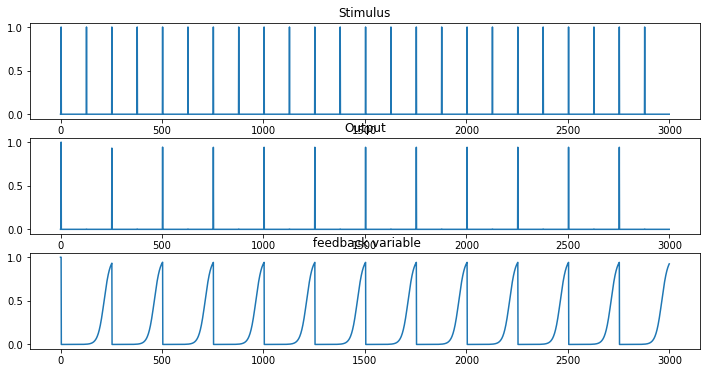

In [35]:
plt.subplot(311)
plt.plot(s)
plt.title('Stimulus')
plt.subplot(312)
plt.plot(x)
plt.title('Output')
plt.subplot(313)
plt.plot(gains)
plt.title(' feedback variable')
plt.gcf().set_size_inches(12,6)

# square pulse

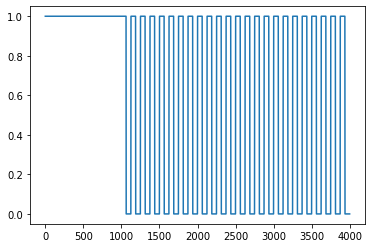

In [39]:
nstep = 3000
frequency = 8#Hz
nperiod = int((1/frequency)/dt)
# generation of stimulations
s = np.zeros(nstep)
for i in range(nstep):
    if i % nperiod ==0:
        s[i:i+62] = 1
startp = int(nstep/3)
s = np.append(np.ones(startp), s)
#s = np.convolve(tp,s,'same')*dt
plt.plot(s)

In [53]:
x = np.zeros_like(s)#y output
y = np.zeros_like(s)#y output
gains = np.zeros_like(s)#y output

B = 50
tau = 0.04

v = 0.0
for i in range(len(s)):
    feedback_filter = np.exp(-np.arange(0,i)*dt/tau)
    y[i]= B*np.dot(x[0:i],feedback_filter[::-1])
    gains[i] = gain_func(y[i]).copy()
    x[i] = gains[i]*s[i]

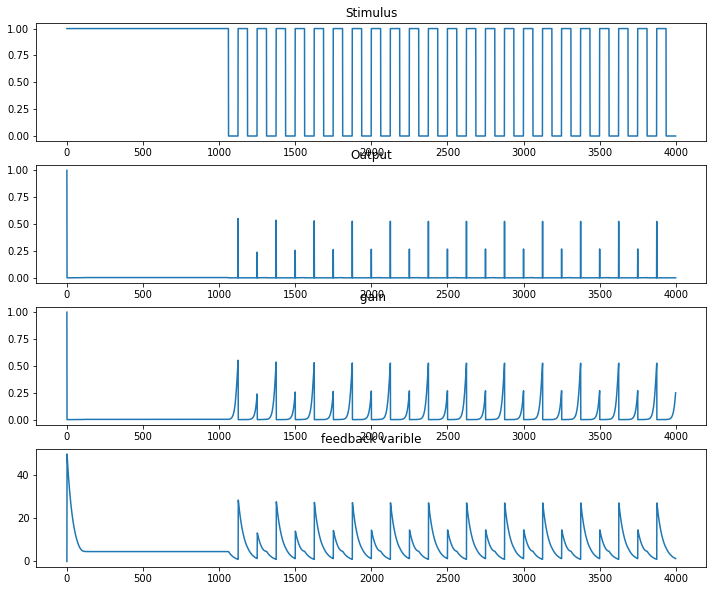

In [54]:
plt.subplot(411)
plt.plot(s)
plt.title('Stimulus')
plt.subplot(412)
plt.plot(x)
plt.title('Output')
plt.subplot(413)
plt.plot(gains)
plt.title(' gain')
plt.subplot(414)
plt.plot(y)
plt.title('feedback varible')
plt.gcf().set_size_inches(12,10)

# sin wave

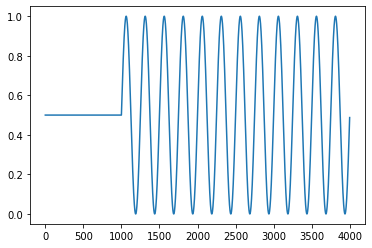

In [59]:
nstep = 3000
frequency = 2#Hz
s = 0.5*np.sin(np.arange(nstep)*dt*frequency*4*np.pi)+0.5
startp = int(nstep/3)
s = np.append(np.ones(startp)*0.5, s)
plt.plot(s)

In [66]:
x = np.zeros_like(s)#y output
y = np.zeros_like(s)#y output
gains = np.zeros_like(s)#y output

B = 100
tau = 0.09

v = 0.0
for i in range(len(s)):
    feedback_filter = np.exp(-np.arange(0,i)*dt/tau)
    y[i]= B*np.dot(x[0:i],feedback_filter[::-1])
    gains[i] = gain_func(y[i]).copy()
    x[i] = gains[i]*s[i]

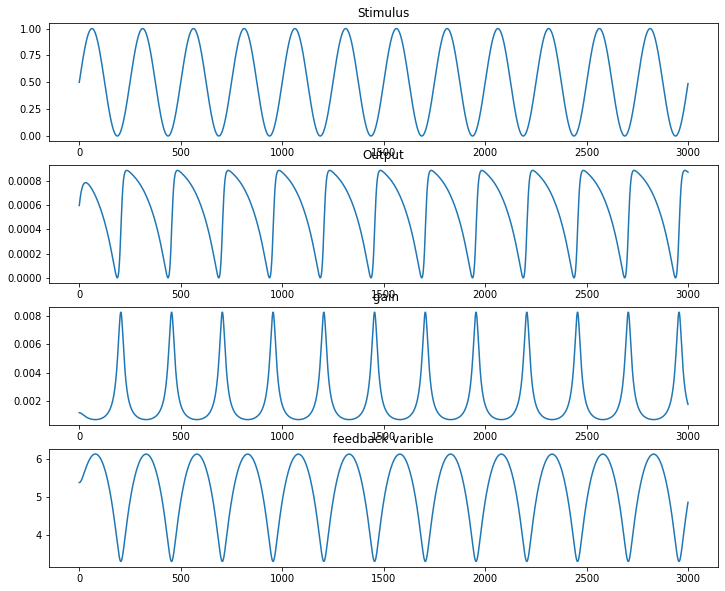

In [67]:
plt.subplot(411)
plt.plot(s[startp:])
plt.title('Stimulus')
plt.subplot(412)
plt.plot(x[startp:])
plt.title('Output')
plt.subplot(413)
plt.plot(gains[startp:])
plt.title(' gain')
plt.subplot(414)
plt.plot(y[startp:])
plt.title('feedback varible')
plt.gcf().set_size_inches(12,10)